In [1]:
from lib import detection, analysis, display
import os

import pims

import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movie_loc = '/Volumes/Coatamer/Users/weinberz/UM Drive/OPP/ZN3P8UY0.tif'
unscored_movie_dat = detection.process_movie(movie_loc, markers=None)

Getting events for ZN3P8UY0.tif... 

/Volumes/Coatamer/Users/weinberz/Google Drive/Code/puffapy/lib/detection.py:219: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  (linear_blurred < percentiles[1])])
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2,  : 
  There are 8 parameters but only 4 observations

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 31 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/p

Finished (2140 seconds)
Getting intensities for ZN3P8UY0.tif... Finished (52 seconds)
Getting features for ZN3P8UY0.tif... 

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Finished (2776 seconds)


In [4]:
tfr_loc = '/Volumes/Coatamer/Users/weinberz/Downloads/2019-05-25_17.15.37_TfR.tif'
tfr_dat = detection.process_movie(tfr_loc, markers=None)

Getting events for 2019-05-25_17.15.37_TfR.tif... Finished (1840 seconds)
Getting intensities for 2019-05-25_17.15.37_TfR.tif... Finished (75 seconds)
Getting features for 2019-05-25_17.15.37_TfR.tif... Finished (2544 seconds)


In [11]:
classifier = joblib.load('global_classifier.joblib')

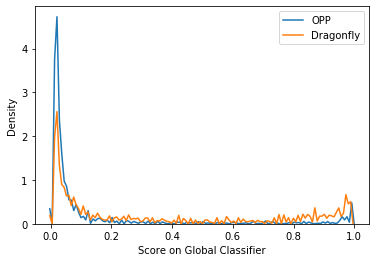

In [30]:
training_fields = ['conv_perim', 'conv_area', 'lifetime_s',
    'randomness_s1', 'randomness_s2', 'cc11', 'cc12', 'cc13', 'cc21',
    'cc22', 'cc23', 'deltaf', 'tau', 'resid_dist', 'residuals_median', 
    'residuals_std', 'snr_median', 'snr_std']

for movie, features in {'OPP': unscored_movie_dat[2], 'Dragonfly': tfr_dat[2]}.items():
    features['proba'] = classifier.predict_proba(features[training_fields])[:,1]
    sns.kdeplot(features['proba'], bw=0.001, label=movie)

plt.xlabel('Score on Global Classifier')
plt.ylabel('Density')
plt.show()

OPP: 4594 (0.8211685322093826)


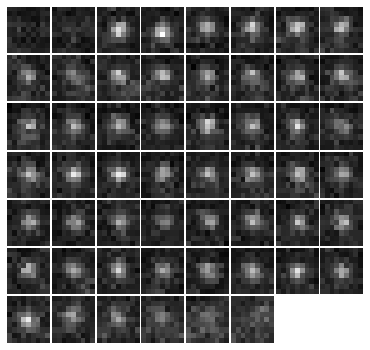

OPP: 5095 (0.8173077650495878)


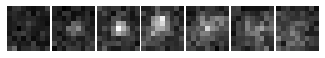

OPP: 7418 (0.9918727863911933)


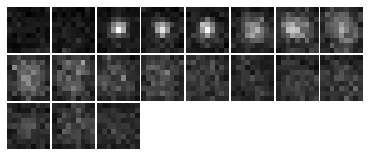

OPP: 9365 (0.8344043661397914)


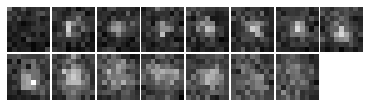

OPP: 9903 (0.9649226738562111)


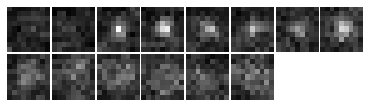

OPP: 11380 (0.9889522462479131)


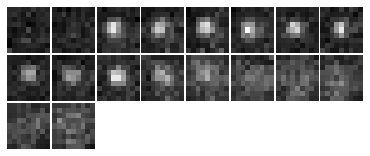

OPP: 13064 (0.9823151333751952)


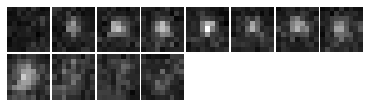

OPP: 15031 (0.852030482365873)


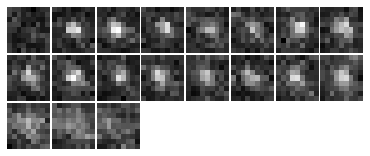

OPP: 16442 (0.9541042873002521)


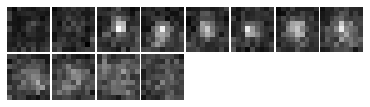

OPP: 18790 (0.9916847286066455)


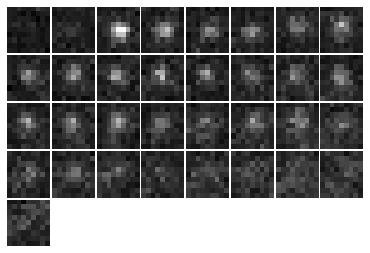

Dragonfly: 1208 (0.9225643484060511)


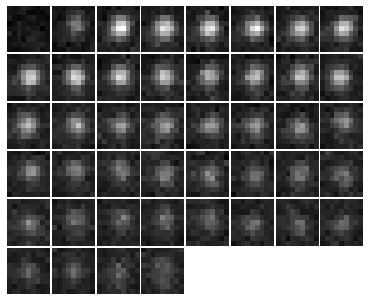

Dragonfly: 2322 (0.9487524290432726)


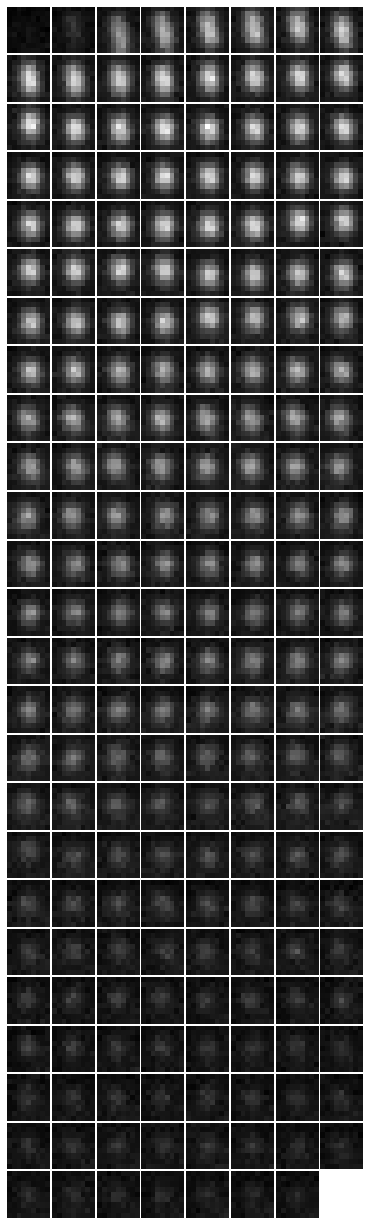

Dragonfly: 3103 (0.9666727510313333)


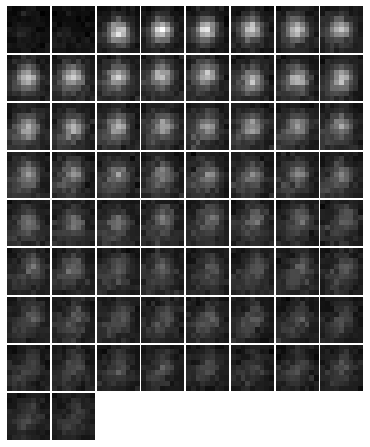

Dragonfly: 3633 (0.9440495834503846)


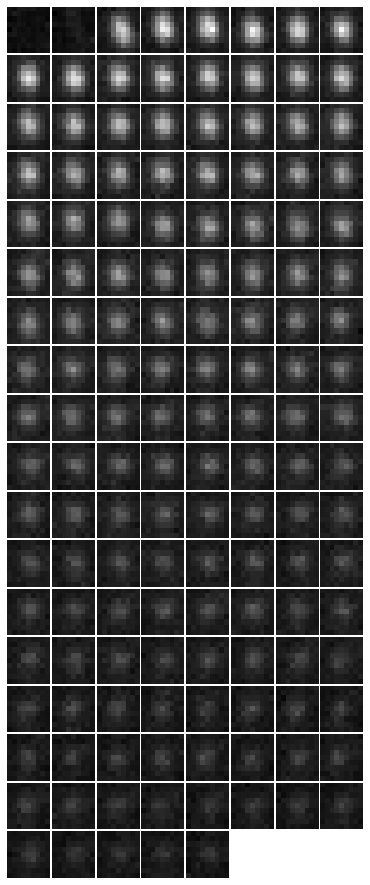

Dragonfly: 3733 (0.948208442505079)


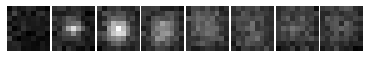

Dragonfly: 5442 (0.9884065394415317)


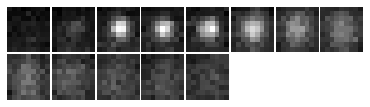

Dragonfly: 5790 (0.9832495028367315)


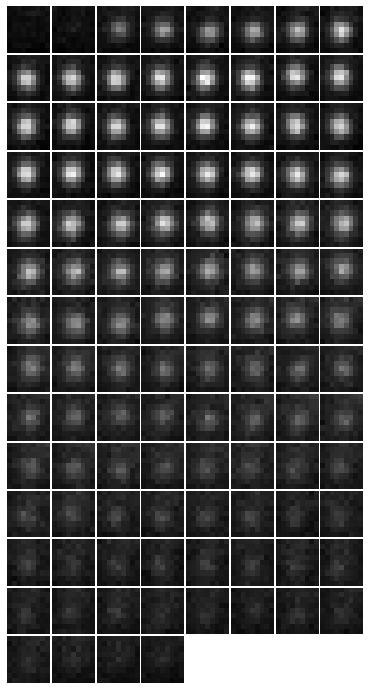

Dragonfly: 6406 (0.9899757375128251)


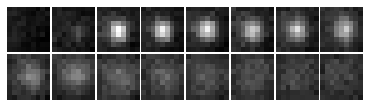

Dragonfly: 6764 (0.8259045334336467)


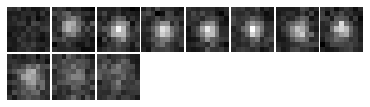

Dragonfly: 7801 (0.8788059999553813)


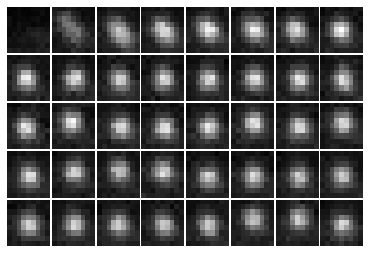

In [28]:
#Let's look at some random nonpuffs with high scores
cutoff = 0.8
for movie, dat in {'OPP': unscored_movie_dat, 'Dragonfly': tfr_dat}.items():
    features = dat[2]
    intensities = dat[1]
    high_proba_sample = features.loc[features['proba'] > cutoff,['particle', 'proba']]
    high_proba_subsample = high_proba_sample.iloc[np.random.choice(len(high_proba_sample), size=10, replace=False),:]
    for particle in np.unique(high_proba_subsample['particle']):
        frames = display.get_frames(intensities.loc[intensities['particle'] == particle,:])
        fig, axs = display.plot_montage(frames, figw=5, figh=0.875)
        print(movie + ": " + 
              str(particle) + ' (' +
              str(high_proba_subsample.loc[high_proba_subsample['particle'] == particle, 'proba'].values[0]) +
              ')')
        plt.show()

In [2]:
basedir = '/Volumes/Coatamer/Users/weinberz/UM Drive/MOR and PKC/20191110 - MOR and PKC'
files = os.listdir(basedir)
tifs = [tif for tif in files if 'tif' in tif]
tifs = [tif for tif in tifs if 'internalization' not in tif]

In [4]:
outdir = '/Volumes/Coatamer/Users/weinberz/UM Drive/MOR and PKC/Analysis/'
for tif in tifs:
    movie_dat = detection.process_movie(basedir + os.sep + tif, markers=None, outdir=outdir)

Getting events for 1-10 dg cell 4 after dmso.tif... 

/Volumes/Coatamer/Users/weinberz/Google Drive/Code/puffapy/lib/detection.py:219: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  (linear_blurred < percentiles[1])])


Finished (2107 seconds)
Getting intensities for 1-10 dg cell 4 after dmso.tif... Finished (42 seconds)
Getting features for 1-10 dg cell 4 after dmso.tif... 

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Finished (2626 seconds)
Getting events for 1-11 dg cell 5 after dmso.tif... 

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2,  : 
  vglm() only handles full-rank models (currently)

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 50 or more warnings (use warnings() to see the first 50)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRu

Finished (2138 seconds)
Getting intensities for 1-11 dg cell 5 after dmso.tif... Finished (32 seconds)
Getting features for 1-11 dg cell 5 after dmso.tif... Finished (2497 seconds)
Getting events for 1-2 dg cell 1 before.tif... Finished (2442 seconds)
Getting intensities for 1-2 dg cell 1 before.tif... Finished (117 seconds)
Getting features for 1-2 dg cell 1 before.tif... Finished (3354 seconds)
Getting events for 1-3 dg cell 2 before.tif... Finished (1918 seconds)
Getting intensities for 1-3 dg cell 2 before.tif... Finished (32 seconds)
Getting features for 1-3 dg cell 2 before.tif... Finished (2235 seconds)
Getting events for 1-4 dg cell 3 before.tif... Finished (1909 seconds)
Getting intensities for 1-4 dg cell 3 before.tif... Finished (22 seconds)
Getting features for 1-4 dg cell 3 before.tif... Finished (2131 seconds)
Getting events for 1-5 dg cell 4 before.tif... Finished (2067 seconds)
Getting intensities for 1-5 dg cell 4 before.tif... Finished (49 seconds)
Getting features fo

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 17 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


Finished (2213 seconds)
Getting intensities for 3-8 cell 2 chel.tif... Finished (49 seconds)
Getting features for 3-8 cell 2 chel.tif... Finished (2661 seconds)
Getting events for 3-8 cell 3 chel.tif... Finished (2120 seconds)
Getting intensities for 3-8 cell 3 chel.tif... Finished (62 seconds)
Getting features for 3-8 cell 3 chel.tif... Finished (2753 seconds)
Getting events for 3-9 cell 4 chel.tif... Finished (2309 seconds)
Getting intensities for 3-9 cell 4 chel.tif... Finished (60 seconds)
Getting features for 3-9 cell 4 chel.tif... Finished (2952 seconds)
Getting events for 4-10 cell 4 dmso.tif... Finished (2129 seconds)
Getting intensities for 4-10 cell 4 dmso.tif... Finished (71 seconds)
Getting features for 4-10 cell 4 dmso.tif... Finished (2914 seconds)
Getting events for 4-11 cell 5 dmso.tif... Finished (2333 seconds)
Getting intensities for 4-11 cell 5 dmso.tif... Finished (85 seconds)
Getting features for 4-11 cell 5 dmso.tif... Finished (3314 seconds)
Getting events for 4-

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 22 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 38 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 25 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 15 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRunt

Finished (2266 seconds)
Getting intensities for 5-11 cell 5 chel.tif... Finished (66 seconds)
Getting features for 5-11 cell 5 chel.tif... Finished (2952 seconds)
Getting events for 5-2 cell 1 before.tif... Finished (2039 seconds)
Getting intensities for 5-2 cell 1 before.tif... Finished (66 seconds)
Getting features for 5-2 cell 1 before.tif... Finished (2773 seconds)
Getting events for 5-3 cell 2 before.tif... Finished (2034 seconds)
Getting intensities for 5-3 cell 2 before.tif... Finished (62 seconds)
Getting features for 5-3 cell 2 before.tif... Finished (2670 seconds)
Getting events for 5-4 cell 3 before.tif... Finished (2084 seconds)
Getting intensities for 5-4 cell 3 before.tif... Finished (68 seconds)
Getting features for 5-4 cell 3 before.tif... Finished (2852 seconds)
Getting events for 5-5 cell 4 before.tif... Finished (2042 seconds)
Getting intensities for 5-5 cell 4 before.tif... Finished (70 seconds)
Getting features for 5-5 cell 4 before.tif... Finished (2815 seconds)
G

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 11 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 9: 
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 32 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 48 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


Finished (1962 seconds)
Getting intensities for 6-11 cell 5 pma.tif... Finished (38 seconds)
Getting features for 6-11 cell 5 pma.tif... Finished (2324 seconds)
Getting events for 6-2 cell 1 before.tif... Finished (2148 seconds)
Getting intensities for 6-2 cell 1 before.tif... Finished (78 seconds)
Getting features for 6-2 cell 1 before.tif... Finished (3029 seconds)
Getting events for 6-3 cell 2 before.tif... Finished (2221 seconds)
Getting intensities for 6-3 cell 2 before.tif... Finished (73 seconds)
Getting features for 6-3 cell 2 before.tif... Finished (3000 seconds)
Getting events for 6-4 cell 3 before.tif... Finished (2280 seconds)
Getting intensities for 6-4 cell 3 before.tif... Finished (99 seconds)
Getting features for 6-4 cell 3 before.tif... Finished (3389 seconds)
Getting events for 6-5 cell 4 before.tif... Finished (2011 seconds)
Getting intensities for 6-5 cell 4 before.tif... Finished (55 seconds)
Getting features for 6-5 cell 4 before.tif... Finished (2588 seconds)
Get

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In log(sigma) :
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  NaNs produced

  warnings.warn(x, RRuntimeWarning)


Finished (1902 seconds)
Getting intensities for 6-6 cell 5 before.tif... Finished (38 seconds)
Getting features for 6-6 cell 5 before.tif... Finished (2246 seconds)
Getting events for 6-7 cell 1 pma.tif... Finished (2047 seconds)
Getting intensities for 6-7 cell 1 pma.tif... Finished (46 seconds)
Getting features for 6-7 cell 1 pma.tif... Finished (2587 seconds)
Getting events for 6-8 cell 2 pma.tif... Finished (2304 seconds)
Getting intensities for 6-8 cell 2 pma.tif... Finished (77 seconds)
Getting features for 6-8 cell 2 pma.tif... Finished (3112 seconds)
Getting events for 6-9 cell 3 pma.tif... Finished (2268 seconds)
Getting intensities for 6-9 cell 3 pma.tif... Finished (88 seconds)
Getting features for 6-9 cell 3 pma.tif... Finished (3288 seconds)


In [5]:
basedir = '/Volumes/Coatamer/Users/weinberz/UM Drive/MOR and PKC/20191111 - MOR and PKC'
files = os.listdir(basedir)
tifs = [tif for tif in files if 'tif' in tif]
tifs = [tif for tif in tifs if 'internalization' not in tif]

outdir = '/Volumes/Coatamer/Users/weinberz/UM Drive/MOR and PKC/Analysis/20191111/'
for tif in tifs:
    movie_dat = detection.process_movie(basedir + os.sep + tif, markers=None, outdir=outdir)

Getting events for 1-2-1 before.tif... Finished (2114 seconds)
Getting intensities for 1-2-1 before.tif... Finished (78 seconds)
Getting features for 1-2-1 before.tif... Finished (2990 seconds)
Getting events for 1-2-2 before.tif... Finished (2243 seconds)
Getting intensities for 1-2-2 before.tif... Finished (87 seconds)
Getting features for 1-2-2 before.tif... Finished (3227 seconds)
Getting events for 1-2-3 before.tif... Finished (2331 seconds)
Getting intensities for 1-2-3 before.tif... Finished (70 seconds)
Getting features for 1-2-3 before.tif... Finished (3145 seconds)
Getting events for 1-2-4 before.tif... Finished (2239 seconds)
Getting intensities for 1-2-4 before.tif... Finished (65 seconds)
Getting features for 1-2-4 before.tif... Finished (2943 seconds)
Getting events for 1-2-5 before.tif... Finished (2301 seconds)
Getting intensities for 1-2-5 before.tif... Finished (97 seconds)
Getting features for 1-2-5 before.tif... Finished (3351 seconds)
Getting events for 1-3-1 dmso.

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 10: 
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 21 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


Finished (2210 seconds)
Getting intensities for 3-2-5 before.tif... Finished (61 seconds)
Getting features for 3-2-5 before.tif... Finished (2830 seconds)
Getting events for 3-3-1 chel.tif... Finished (1909 seconds)
Getting intensities for 3-3-1 chel.tif... Finished (32 seconds)
Getting features for 3-3-1 chel.tif... Finished (2213 seconds)
Getting events for 3-3-2 chel.tif... Finished (2101 seconds)
Getting intensities for 3-3-2 chel.tif... Finished (66 seconds)
Getting features for 3-3-2 chel.tif... Finished (2639 seconds)
Getting events for 3-3-3 chel.tif... Finished (2187 seconds)
Getting intensities for 3-3-3 chel.tif... Finished (57 seconds)
Getting features for 3-3-3 chel.tif... Finished (2941 seconds)
Getting events for 3-3-4 chel.tif... Finished (2389 seconds)
Getting intensities for 3-3-4 chel.tif... Finished (91 seconds)
Getting features for 3-3-4 chel.tif... Finished (3258 seconds)
Getting events for 3-3-5 chel.tif... Finished (2018 seconds)
Getting intensities for 3-3-5 ch

In [19]:
basedir = '/Volumes/Coatamer/Users/weinberz/UM Drive/OPP'
files = os.listdir(basedir)
tifs = [tif for tif in files if 'tif' in tif]
xmls = [xml.split('-')[0] for xml in files if 'xml' in xml]
unscored = [tif for tif in tifs if tif.split('.')[0] not in xmls]

In [21]:
outdir = '/Volumes/Coatamer/Users/weinberz/UM Drive/MOR and PKC/Analysis/OPP/'
for tif in unscored:
    movie_dat = detection.process_movie(basedir + os.sep + tif, markers=None, outdir=outdir)

Getting events for CVC2YT54.tif... Finished (2467 seconds)
Getting intensities for CVC2YT54.tif... Finished (105 seconds)
Getting features for CVC2YT54.tif... Finished (1129 seconds)
Getting events for CZ2867CD.tif... Finished (2204 seconds)
Getting intensities for CZ2867CD.tif... Finished (95 seconds)
Getting features for CZ2867CD.tif... Finished (994 seconds)
Getting events for EKLMQ5ME.tif... Finished (2174 seconds)
Getting intensities for EKLMQ5ME.tif... Finished (78 seconds)
Getting features for EKLMQ5ME.tif... Finished (874 seconds)
Getting events for FV7IKP8K.tif... Finished (2183 seconds)
Getting intensities for FV7IKP8K.tif... Finished (87 seconds)
Getting features for FV7IKP8K.tif... Finished (1001 seconds)
Getting events for GHP30TCX.tif... Finished (2198 seconds)
Getting intensities for GHP30TCX.tif... Finished (83 seconds)
Getting features for GHP30TCX.tif... Finished (907 seconds)
Getting events for HJ48UVBS.tif... Finished (2171 seconds)
Getting intensities for HJ48UVBS.

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in eta[, 1] : object of type 'closure' is not subsettable

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In min(y) :
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  no non-missing arguments to min; returning Inf

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in vglm.fitter(x = x, y = y, w = w, offset = o

Finished (2043 seconds)
Getting intensities for HP8WO3FC.tif... Finished (51 seconds)
Getting features for HP8WO3FC.tif... Finished (538 seconds)
Getting events for HZ6HWB9K.tif... Finished (2061 seconds)
Getting intensities for HZ6HWB9K.tif... Finished (58 seconds)
Getting features for HZ6HWB9K.tif... Finished (616 seconds)
Getting events for I7DXI80F.tif... Finished (2186 seconds)
Getting intensities for I7DXI80F.tif... Finished (93 seconds)
Getting features for I7DXI80F.tif... Finished (1039 seconds)
Getting events for IPK0LRVR.tif... Finished (2156 seconds)
Getting intensities for IPK0LRVR.tif... Finished (91 seconds)
Getting features for IPK0LRVR.tif... Finished (1005 seconds)
Getting events for J8XMVD58.tif... Finished (2242 seconds)
Getting intensities for J8XMVD58.tif... Finished (78 seconds)
Getting features for J8XMVD58.tif... Finished (843 seconds)
Getting events for L0JZE492.tif... Finished (2026 seconds)
Getting intensities for L0JZE492.tif... Finished (38 seconds)
Getting

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 20 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)


Finished (1895 seconds)
Getting intensities for UIMV91KS.tif... Finished (17 seconds)
Getting features for UIMV91KS.tif... Finished (140 seconds)
Getting events for VE8HLJN8.tif... Finished (2005 seconds)
Getting intensities for VE8HLJN8.tif... Finished (38 seconds)
Getting features for VE8HLJN8.tif... Finished (370 seconds)
Getting events for VPU69WNG.tif... Finished (2239 seconds)
Getting intensities for VPU69WNG.tif... Finished (74 seconds)
Getting features for VPU69WNG.tif... Finished (798 seconds)
Getting events for VRYM3OT9.tif... Finished (2013 seconds)
Getting intensities for VRYM3OT9.tif... Finished (43 seconds)
Getting features for VRYM3OT9.tif... Finished (441 seconds)
Getting events for WD5BFZ0K.tif... Finished (2136 seconds)
Getting intensities for WD5BFZ0K.tif... Finished (70 seconds)
Getting features for WD5BFZ0K.tif... Finished (788 seconds)
Getting events for WYHLSC8Q.tif... Finished (2282 seconds)
Getting intensities for WYHLSC8Q.tif... Finished (81 seconds)
Getting f

In [3]:
basedir = '/Volumes/Coatamer/Users/weinberz/UM Drive/50Hz Puffs/B2 and Actin'
b2 = []
for root, subdirs, files in os.walk(basedir):
    for file in files:
        if ('tif' in file) & ('internalization' not in file):
            b2.append((root, file))

In [4]:
base_out = '/Volumes/Coatamer/Users/weinberz/UM Drive/50Hz Puffs/Analysis/B2'
for parent, tif in b2:
    day = os.path.basename(parent).split(' ')[0]
    outdir = base_out + os.sep + day + os.sep
    movie_dat = detection.process_movie(parent + os.sep + tif, markers=None, outdir=outdir)

Getting events for 1-2-1 wt_b2 puffs dmso.tif... 

/Volumes/Coatamer/Users/weinberz/Google Drive/Code/puffapy/lib/detection.py:219: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  (linear_blurred < percentiles[1])])


Finished (2129 seconds)
Getting intensities for 1-2-1 wt_b2 puffs dmso.tif... Finished (49 seconds)
Getting features for 1-2-1 wt_b2 puffs dmso.tif... 

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Finished (538 seconds)
Getting events for 1-2-10 wt_b2 puffs dmso.tif... Finished (2100 seconds)
Getting intensities for 1-2-10 wt_b2 puffs dmso.tif... Finished (45 seconds)
Getting features for 1-2-10 wt_b2 puffs dmso.tif... Finished (489 seconds)
Getting events for 1-2-2 wt_b2 puffs dmso.tif... Finished (2109 seconds)
Getting intensities for 1-2-2 wt_b2 puffs dmso.tif... Finished (54 seconds)
Getting features for 1-2-2 wt_b2 puffs dmso.tif... Finished (580 seconds)
Getting events for 1-2-3 wt_b2 puffs dmso.tif... Finished (1906 seconds)
Getting intensities for 1-2-3 wt_b2 puffs dmso.tif... Finished (27 seconds)
Getting features for 1-2-3 wt_b2 puffs dmso.tif... Finished (270 seconds)
Getting events for 1-2-4 wt_b2 puffs dmso.tif... Finished (2208 seconds)
Getting intensities for 1-2-4 wt_b2 puffs dmso.tif... Finished (70 seconds)
Getting features for 1-2-4 wt_b2 puffs dmso.tif... Finished (757 seconds)
Getting events for 1-2-5 wt_b2 puffs dmso.tif... Finished (2182 seconds)
Getting i

/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2,  : 
  vglm() only handles full-rank models (currently)

  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 50 or more warnings (use warnings() to see the first 50)
  warnings.warn(x, RRuntimeWarning)
/Volumes/Coatamer/Users/weinberz/miniconda3/envs/py37/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)


Finished (2001 seconds)
Getting intensities for 4-2-3 sa_b2 puffs lata.tif... Finished (33 seconds)
Getting features for 4-2-3 sa_b2 puffs lata.tif... Finished (352 seconds)
Getting events for 4-2-4 sa_b2 puffs lata.tif... Finished (1949 seconds)
Getting intensities for 4-2-4 sa_b2 puffs lata.tif... Finished (37 seconds)
Getting features for 4-2-4 sa_b2 puffs lata.tif... Finished (361 seconds)
Getting events for 4-2-5 sa_b2 puffs lata.tif... Finished (1922 seconds)
Getting intensities for 4-2-5 sa_b2 puffs lata.tif... Finished (18 seconds)
Getting features for 4-2-5 sa_b2 puffs lata.tif... Finished (160 seconds)
Getting events for 4-2-6 sa_b2 puffs lata.tif... Finished (2080 seconds)
Getting intensities for 4-2-6 sa_b2 puffs lata.tif... Finished (64 seconds)
Getting features for 4-2-6 sa_b2 puffs lata.tif... Finished (691 seconds)
Getting events for 4-2-7 sa_b2 puffs lata.tif... Finished (1951 seconds)
Getting intensities for 4-2-7 sa_b2 puffs lata.tif... Finished (33 seconds)
Getting 

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [27]:
import importlib
importlib.reload(detection)

<module 'lib.detection' from '/Volumes/Coatamer/Users/weinberz/Google Drive/Code/puffapy/lib/detection.py'>

In [28]:
for parent, tif in b2[62:]:
    day = os.path.basename(parent).split(' ')[0]
    outdir = base_out + os.sep + day + os.sep
    movie_dat = detection.process_movie(parent + os.sep + tif, markers=None, outdir=outdir)

Getting events for 7-2-2 sa_b2 puffs dmso.tif... Finished (2183 seconds)
Getting intensities for 7-2-2 sa_b2 puffs dmso.tif... Finished (21 seconds)
Getting features for 7-2-2 sa_b2 puffs dmso.tif... Finished (172 seconds)
Getting events for 7-2-3 sa_b2 puffs dmso.tif... Finished (2479 seconds)
Getting intensities for 7-2-3 sa_b2 puffs dmso.tif... Finished (78 seconds)
Getting features for 7-2-3 sa_b2 puffs dmso.tif... Finished (787 seconds)
Getting events for 7-2-4 sa_b2 puffs dmso.tif... Finished (2437 seconds)
Getting intensities for 7-2-4 sa_b2 puffs dmso.tif... Finished (60 seconds)
Getting features for 7-2-4 sa_b2 puffs dmso.tif... Finished (719 seconds)
Getting events for 7-2-5 sa_b2 puffs dmso.tif... Finished (2245 seconds)
Getting intensities for 7-2-5 sa_b2 puffs dmso.tif... Finished (60 seconds)
Getting features for 7-2-5 sa_b2 puffs dmso.tif... Finished (667 seconds)
Getting events for 7-2-6 sa_b2 puffs dmso.tif... Finished (2073 seconds)
Getting intensities for 7-2-6 sa_b2